# Webscrape 1

In [6]:
pip install --user annoy

    100% |████████████████████████████████| 645kB 8.2MB/s eta 0:00:01
  Stored in directory: /Users/flatironschool/Library/Caches/pip/wheels/d3/d7/68/3795670ef4c6781fc10df0d6cf83b922244aa28cd9489d1176
Successfully built annoy
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import time
from tqdm import tqdm
import pickle as pkl
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
from annoy import AnnoyIndex
import random
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity
from sklearn.cluster import KMeans # import from sklearn
from scipy.cluster.hierarchy import dendrogram, ward, single, complete, average
from sklearn.metrics import silhouette_score, calinski_harabaz_score
from sklearn.decomposition import PCA

# Initial Data Cleaning - Eliminating Duplicates, Creating Uniform Classes and Transforming Numbers to Floats and Integers

In [311]:
df_for_brands = pkl.load(open('df_pickles/df_reg_1.p','rb'))

In [313]:
df_for_brands = df_for_brands[df_for_brands['Engine type']!='Electric']

In [158]:
df_gas = pkl.load(open('df_pickles/df_gas_sc_dmd.p','rb'))

In [12]:
df_elec = pkl.load(open('df_pickles/df_elec_sc_dmd.p','rb'))

In [328]:
k_means = KMeans(n_clusters=500, n_init=20) # Must set number of clusters at initialization time!
k_means.fit(df_gas) # Run the clustering algorithm
cluster_assignments = k_means.predict(df_gas) # Generate cluster index values for each row in df

In [329]:
labels = k_means.labels_
silhouette_score(df_gas, labels, metric='euclidean')

0.5985379325978171

In [330]:
calinski_harabaz_score(df_gas, labels)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


78290.76749416011

In [331]:
df_gas['labels'] = cluster_assignments

In [332]:
df_gas

,price,base_engine_size,fuel_tank_capacity,epa_mileage_combined,Horsepower,Torque,third_row_seating,first_row_seating,rear_row_seating,curb_weight,...,brand_34,brand_35,brand_36,brand_37,brand_39,brand_40,brand_41,labels,x,y
/cars/2019/acura/ilx/79088,0.028002,2.4,0.151220,0.168675,0.171071,0.123113,0.000000,0.156915,0.189442,0.156797,...,0,0,0,0,0,0,0,198,16.553927,-1.310566
/cars/2019/acura/ilx/79090,0.031648,2.4,0.151220,0.168675,0.171071,0.123113,0.000000,0.156915,0.189442,0.160939,...,0,0,0,0,0,0,0,198,16.553927,-1.310288
/cars/2019/acura/ilx/79089,0.035815,2.4,0.151220,0.168675,0.171071,0.123113,0.000000,0.156915,0.189442,0.164314,...,0,0,0,0,0,0,0,198,16.553323,-1.290982
/cars/2019/acura/ilx/79092,0.035607,2.4,0.151220,0.168675,0.171071,0.123113,0.000000,0.156915,0.189442,0.161246,...,0,0,0,0,0,0,0,198,16.553927,-1.310183
/cars/2019/acura/ilx/79091,0.039774,2.4,0.151220,0.168675,0.171071,0.123113,0.000000,0.156915,0.189442,0.164928,...,0,0,0,0,0,0,0,198,16.553324,-1.290863
/cars/2019/acura/mdx/77624,0.066338,3.5,0.304878,0.108434,0.294854,0.224158,0.351861,0.250347,0.381952,0.300552,...,0,0,0,0,0,0,0,498,-4.447194,0.198594
/cars/2019/acura/mdx/77621,0.090819,3.5,0.304878,0.108434,0.294854,0.224158,0.351861,0.250347,0.381952,0.309451,...,0,0,0,0,0,0,0,23,-4.446001,0.449173
/cars/2019/acura/mdx/77620,0.094986,3.5,0.304878,0.108434,0.294854,0.224158,0.351861,0.250347,0.381952,0.316508,...,0,0,0,0,0,0,0,381,-4.446055,0.400172
/cars/2019/acura/mdx/77623,0.076756,3.5,0.304878,0.108434,0.294854,0.224158,0.351861,0.250347,0.381952,0.303928,...,0,0,0,0,0,0,0,381,-4.446053,0.399165
/cars/2019/acura/mdx/77622,0.080923,3.5,0.304878,0.108434,0.294854,0.224158,0.351861,0.250347,0.381952,0.304388,...,0,0,0,0,0,0,0,23,-4.446001,0.448710


In [334]:
pca = PCA(n_components=2)

In [335]:
df_gas.iloc[0:3,:-2]

,price,base_engine_size,fuel_tank_capacity,epa_mileage_combined,Horsepower,Torque,third_row_seating,first_row_seating,rear_row_seating,curb_weight,...,brand_32,brand_33,brand_34,brand_35,brand_36,brand_37,brand_39,brand_40,brand_41,labels
/cars/2019/acura/ilx/79088,0.028002,2.4,0.15122,0.168675,0.171071,0.123113,0.0,0.156915,0.189442,0.156797,...,0,0,0,0,0,0,0,0,0,198
/cars/2019/acura/ilx/79090,0.031648,2.4,0.15122,0.168675,0.171071,0.123113,0.0,0.156915,0.189442,0.160939,...,0,0,0,0,0,0,0,0,0,198
/cars/2019/acura/ilx/79089,0.035815,2.4,0.15122,0.168675,0.171071,0.123113,0.0,0.156915,0.189442,0.164314,...,0,0,0,0,0,0,0,0,0,198


In [336]:
df_gas['x']=pca.fit_transform((df_gas.iloc[:,:-2]))[:,0]

In [337]:
df_gas['y']=pca.fit_transform((df_gas.iloc[:,:-2]))[:,1]

In [338]:
pca.components_.shape

(2, 115)

In [339]:
df_gas.iloc[:, -3]

/cars/2019/acura/ilx/79088     198
/cars/2019/acura/ilx/79090     198
/cars/2019/acura/ilx/79089     198
/cars/2019/acura/ilx/79092     198
/cars/2019/acura/ilx/79091     198
/cars/2019/acura/mdx/77624     498
/cars/2019/acura/mdx/77621      23
/cars/2019/acura/mdx/77620     381
/cars/2019/acura/mdx/77623     381
/cars/2019/acura/mdx/77622      23
/cars/2019/acura/mdx/77619     498
/cars/2019/acura/mdx/77625      23
/cars/2019/acura/mdx/77626     381
/cars/2019/acura/mdx/77628      23
/cars/2019/acura/mdx/77627     381
/cars/2019/acura/mdx/77631     381
/cars/2019/acura/mdx/77629     381
/cars/2019/acura/mdx/77630      23
/cars/2019/acura/nsx/79093     322
/cars/2019/acura/rdx/77635      71
/cars/2019/acura/rdx/77633      71
/cars/2019/acura/rdx/77632      71
/cars/2019/acura/rdx/77634      71
/cars/2019/acura/rdx/77639      71
/cars/2019/acura/rdx/77637      71
/cars/2019/acura/rdx/77636      71
/cars/2019/acura/rdx/77638      71
/cars/2019/acura/rlx/77640     317
/cars/2019/acura/rlx

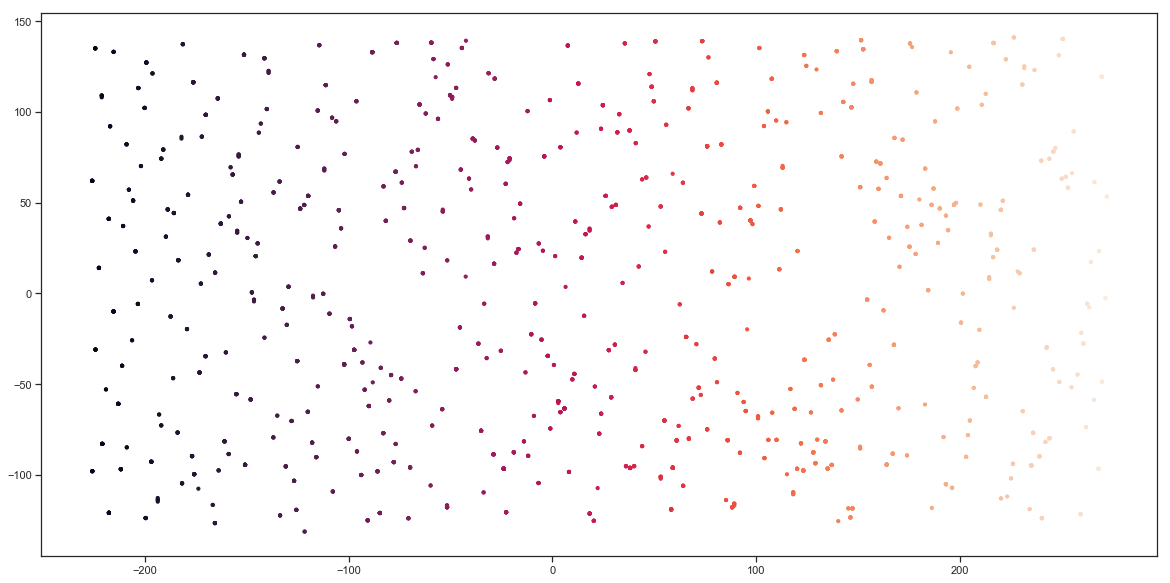

In [340]:
plt.figure(figsize=(20,10))
plt.scatter(df_gas['x'], df_gas['y'], c = df_gas['labels'], s = 10)
# cl_centers = k_means.cluster_centers_
#plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=5);

In [341]:
k_means.get_params

<bound method BaseEstimator.get_params of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=500, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)>

In [342]:
df_gas_hac_single = df_gas.iloc[:,:-2]

In [344]:
agg_clust_single = AgglomerativeClustering(linkage='single', n_clusters=400)
assigned_clust_single = agg_clust_single.fit_predict(df_gas_hac_single)
df_gas_hac_single['labels'] = assigned_clust_single
#plt.scatter(df_gas.iloc[:, 0], df_gas.iloc[:, 2], c = assigned_clust, s = 10);

In [345]:
df_gas_hac_single['x']=pca.fit_transform((df_gas_hac_single.iloc[:,:-2]))[:,0]

In [346]:
df_gas_hac_single['y']=pca.fit_transform((df_gas_hac_single.iloc[:,:-2]))[:,1]

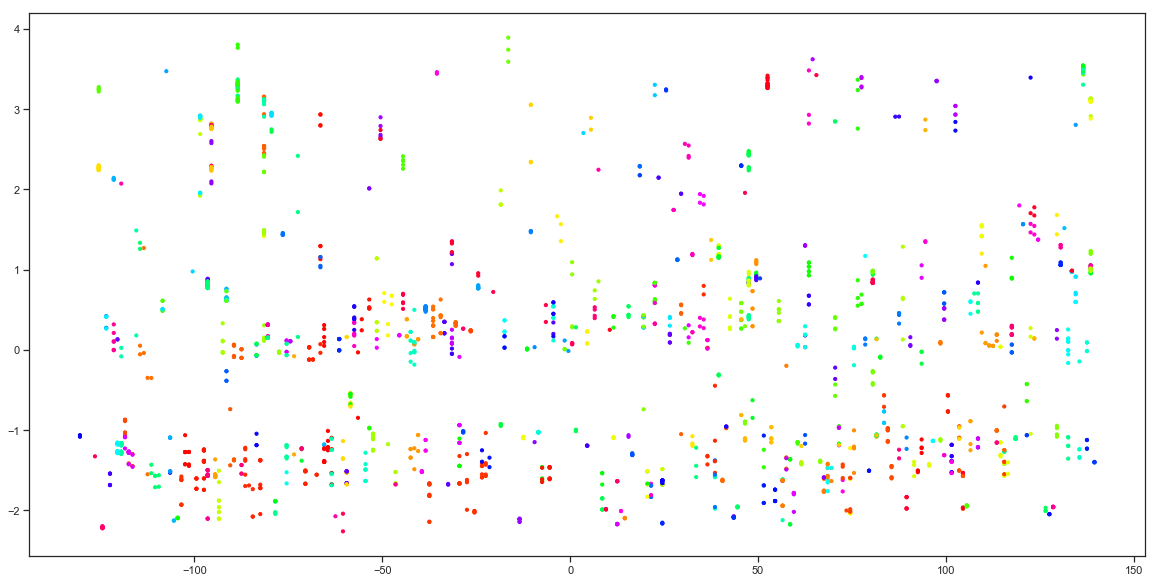

In [347]:
plt.figure(figsize=(20,10))
plt.scatter(df_gas_hac_single['x'], df_gas_hac_single['y'], c = df_gas_hac_single['labels'], cmap='hsv', s = 10)

In [348]:
df_gas_hac_complete = df_gas.iloc[:,:-2]

In [349]:
agg_clust_complete = AgglomerativeClustering(linkage='complete', n_clusters=400)
assigned_clust_complete = agg_clust_complete.fit_predict(df_gas_hac_complete)
df_gas_hac_complete['labels'] = assigned_clust_complete
#plt.scatter(df_gas.iloc[:, 0], df_gas.iloc[:, 2], c = assigned_clust, s = 10);

In [350]:
df_gas_hac_complete['x']=pca.fit_transform((df_gas_hac_complete.iloc[:,:-2]))[:,0]

In [351]:
df_gas_hac_complete['y']=pca.fit_transform((df_gas_hac_complete.iloc[:,:-2]))[:,1]

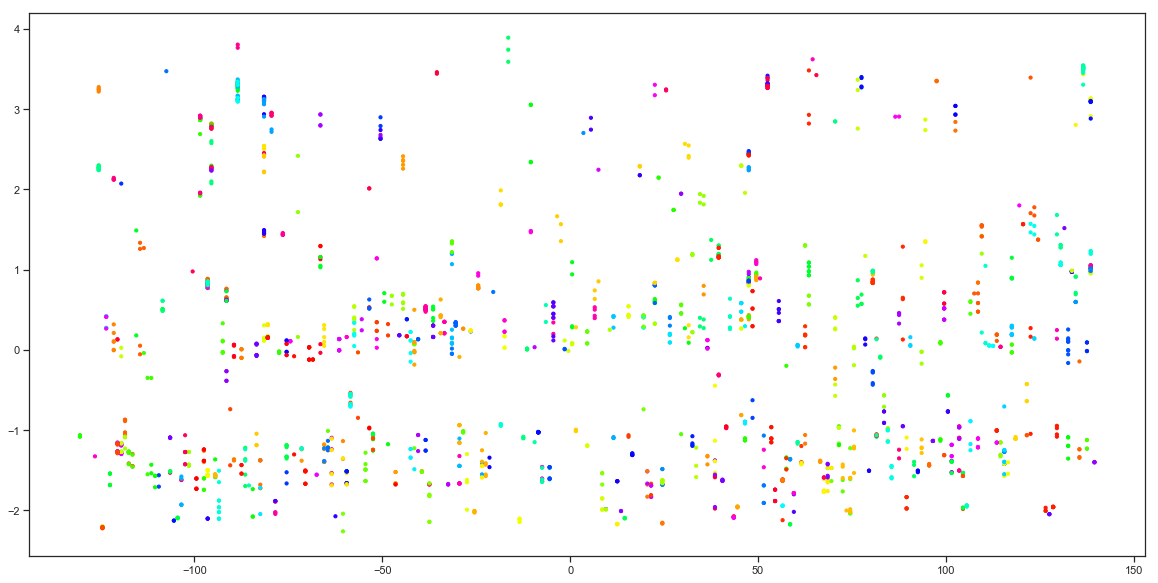

In [352]:
plt.figure(figsize=(20,10))
plt.scatter(df_gas_hac_complete['x'], df_gas_hac_complete['y'], c = df_gas_hac_complete['labels'], cmap='hsv', s = 10)

In [353]:
df_gas_hac_avg = df_gas.iloc[:,:-2]

In [354]:
agg_clust_avg = AgglomerativeClustering(linkage='average', n_clusters=400)
assigned_clust_avg = agg_clust_avg.fit_predict(df_gas_hac_avg)
df_gas_hac_avg['labels'] = assigned_clust_avg
#plt.scatter(df_gas.iloc[:, 0], df_gas.iloc[:, 2], c = assigned_clust, s = 10);

In [355]:
df_gas_hac_avg['x']=pca.fit_transform((df_gas_hac_avg.iloc[:,:-2]))[:,0]

In [356]:
df_gas_hac_avg['y']=pca.fit_transform((df_gas_hac_avg.iloc[:,:-2]))[:,1]

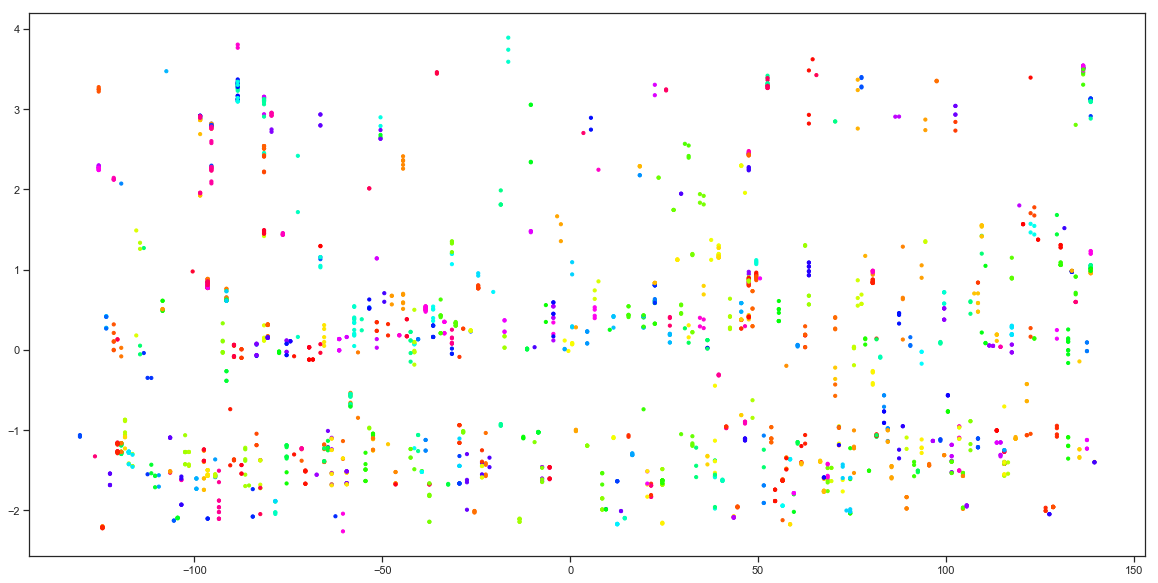

In [357]:
plt.figure(figsize=(20,10))
plt.scatter(df_gas_hac_avg['x'], df_gas_hac_avg['y'], c = df_gas_hac_avg['labels'], cmap='hsv', s = 10)

In [358]:
df_gas_hac_ward = df_gas.iloc[:,:-2]

In [359]:
df_gas_hac_ward.iloc[:,:-2]

,price,base_engine_size,fuel_tank_capacity,epa_mileage_combined,Horsepower,Torque,third_row_seating,first_row_seating,rear_row_seating,curb_weight,...,brand_30,brand_31,brand_32,brand_33,brand_34,brand_35,brand_36,brand_37,brand_39,brand_40
/cars/2019/acura/ilx/79088,0.028002,2.4,0.151220,0.168675,0.171071,0.123113,0.000000,0.156915,0.189442,0.156797,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/acura/ilx/79090,0.031648,2.4,0.151220,0.168675,0.171071,0.123113,0.000000,0.156915,0.189442,0.160939,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/acura/ilx/79089,0.035815,2.4,0.151220,0.168675,0.171071,0.123113,0.000000,0.156915,0.189442,0.164314,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/acura/ilx/79092,0.035607,2.4,0.151220,0.168675,0.171071,0.123113,0.000000,0.156915,0.189442,0.161246,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/acura/ilx/79091,0.039774,2.4,0.151220,0.168675,0.171071,0.123113,0.000000,0.156915,0.189442,0.164928,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/acura/mdx/77624,0.066338,3.5,0.304878,0.108434,0.294854,0.224158,0.351861,0.250347,0.381952,0.300552,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/acura/mdx/77621,0.090819,3.5,0.304878,0.108434,0.294854,0.224158,0.351861,0.250347,0.381952,0.309451,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/acura/mdx/77620,0.094986,3.5,0.304878,0.108434,0.294854,0.224158,0.351861,0.250347,0.381952,0.316508,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/acura/mdx/77623,0.076756,3.5,0.304878,0.108434,0.294854,0.224158,0.351861,0.250347,0.381952,0.303928,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/acura/mdx/77622,0.080923,3.5,0.304878,0.108434,0.294854,0.224158,0.351861,0.250347,0.381952,0.304388,...,0,0,0,0,0,0,0,0,0,0


In [360]:
agg_clust_ward = AgglomerativeClustering(linkage='ward', n_clusters=400)
assigned_clust_ward = agg_clust_ward.fit_predict(df_gas_hac_ward)
df_gas_hac_ward['labels'] = assigned_clust_ward
#plt.scatter(df_gas.iloc[:, 0], df_gas.iloc[:, 2], c = assigned_clust, s = 10);

In [361]:
df_gas_hac_ward['x']=pca.fit_transform((df_gas_hac_ward.iloc[:,:-2]))[:,0]

In [362]:
df_gas_hac_ward['y']=pca.fit_transform((df_gas_hac_ward.iloc[:,:-2]))[:,1]

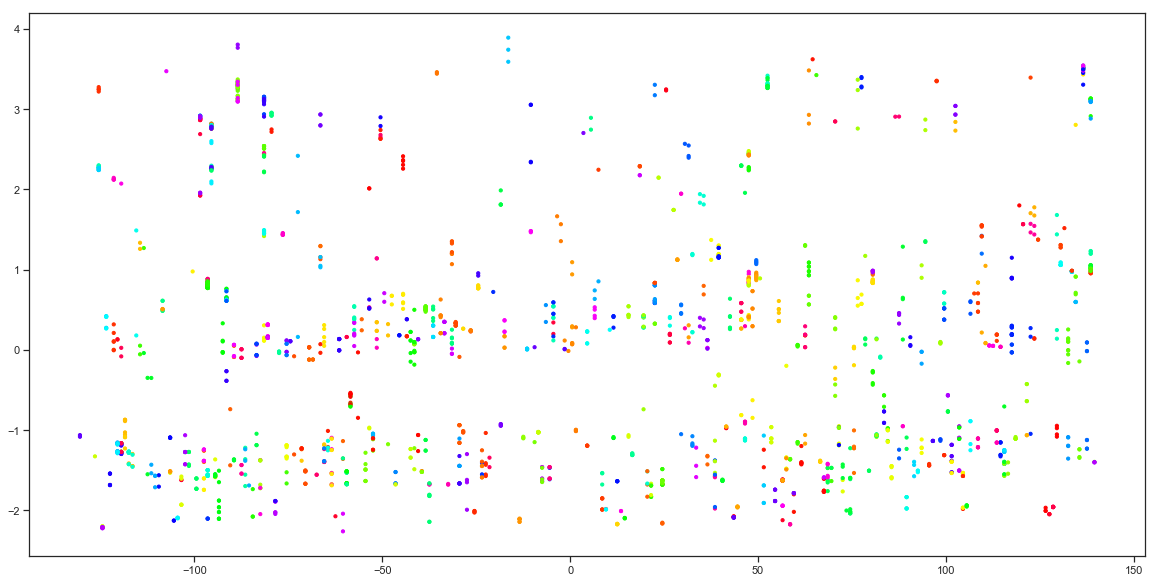

In [363]:
plt.figure(figsize=(20,10))
plt.scatter(df_gas_hac_ward['x'], df_gas_hac_ward['y'], c = df_gas_hac_ward['labels'], cmap='hsv', s = 10)



Text(0, 0.5, 'Cluster distance')

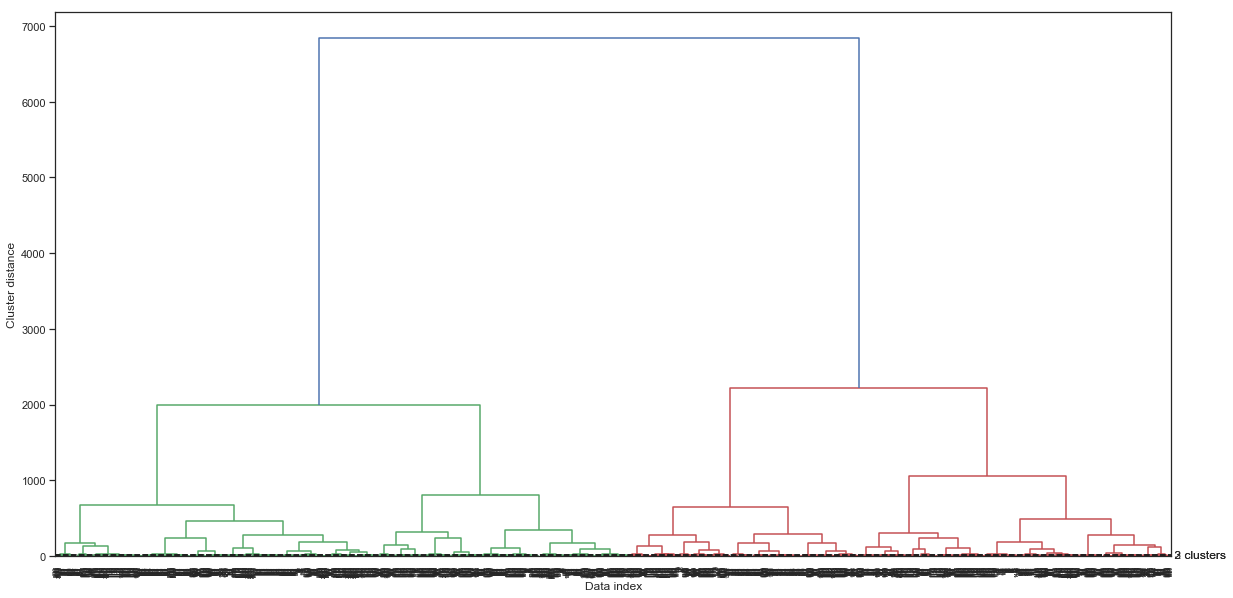

In [274]:
plt.figure(figsize=(20,10))
linkage_array = single(df_gas)

# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [16, 16], '--', c='k')
ax.plot(bounds, [9, 9], '--', c='k')
ax.text(bounds[1], 16, ' 2 clusters', va='center', fontdict={'size': 12})
ax.text(bounds[1], 9, ' 3 clusters', va='center', fontdict={'size': 12})
plt.xlabel("Data index")
plt.ylabel("Cluster distance")

Text(0, 0.5, 'Cluster distance')

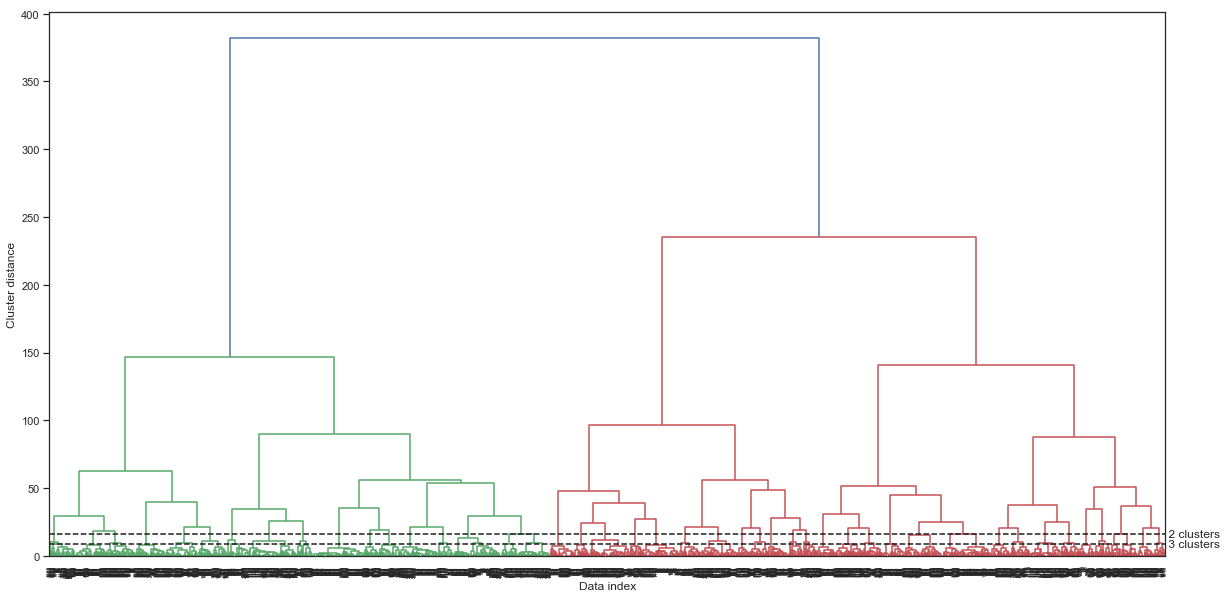

In [279]:
plt.figure(figsize=(20,10))
linkage_array = complete(df_gas)

# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [16, 16], '--', c='k')
ax.plot(bounds, [9, 9], '--', c='k')
ax.text(bounds[1], 16, ' 2 clusters', va='center', fontdict={'size': 12})
ax.text(bounds[1], 9, ' 3 clusters', va='center', fontdict={'size': 12})
plt.xlabel("Data index")
plt.ylabel("Cluster distance")

Text(0, 0.5, 'Cluster distance')

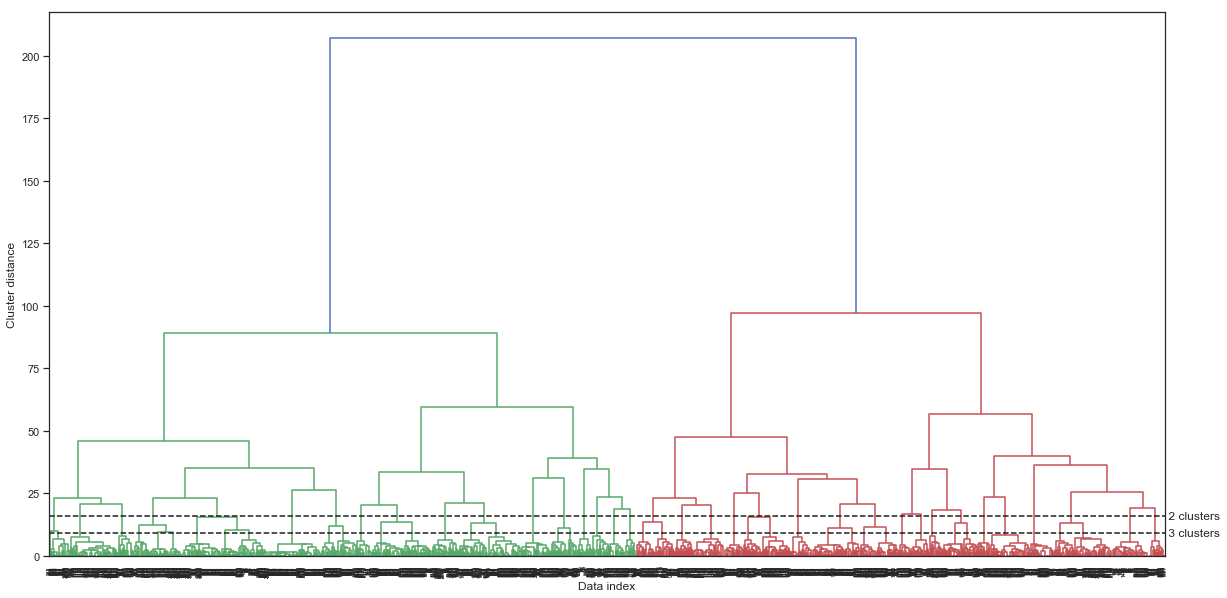

In [280]:
plt.figure(figsize=(20,10))
linkage_array = average(df_gas)

# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [16, 16], '--', c='k')
ax.plot(bounds, [9, 9], '--', c='k')
ax.text(bounds[1], 16, ' 2 clusters', va='center', fontdict={'size': 12})
ax.text(bounds[1], 9, ' 3 clusters', va='center', fontdict={'size': 12})
plt.xlabel("Data index")
plt.ylabel("Cluster distance")

Text(0, 0.5, 'Cluster distance')

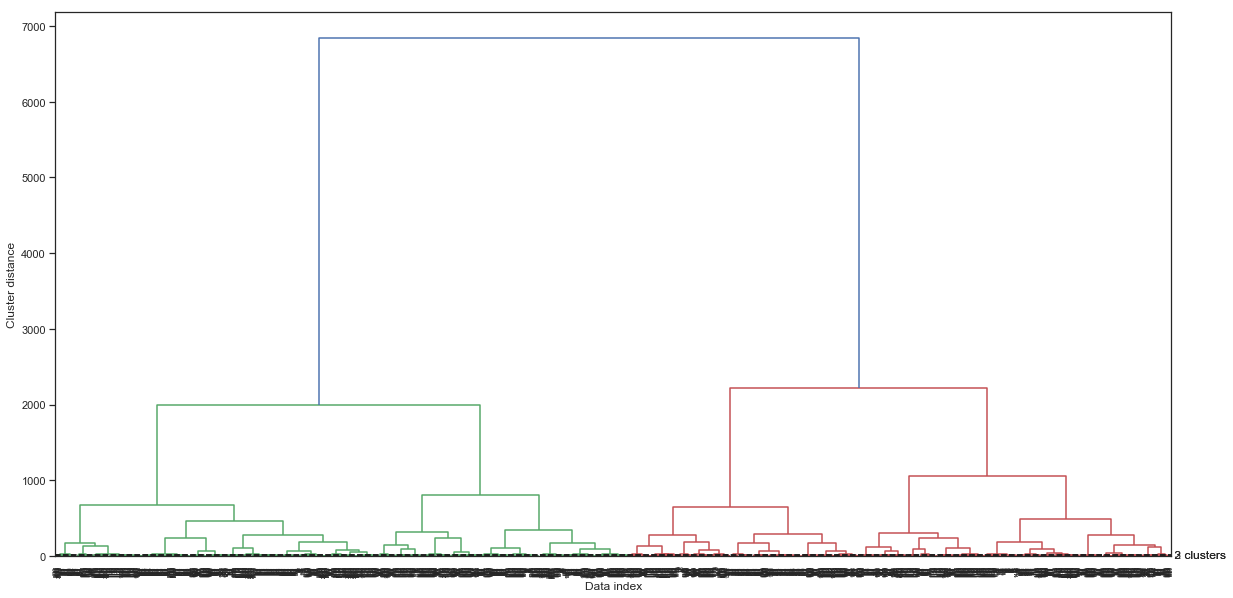

In [281]:

plt.figure(figsize=(20,10))
linkage_array = ward(df_gas)

# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [16, 16], '--', c='k')
ax.plot(bounds, [9, 9], '--', c='k')
ax.text(bounds[1], 16, ' 2 clusters', va='center', fontdict={'size': 12})
ax.text(bounds[1], 9, ' 3 clusters', va='center', fontdict={'size': 12})
plt.xlabel("Data index")
plt.ylabel("Cluster distance")

In [365]:
as_kmeans = k_means.fit_predict(df_gas)
as_single = agg_clust_single.fit_predict(df_gas)
as_comp = agg_clust_complete.fit_predict(df_gas)
as_avg = agg_clust_avg.fit_predict(df_gas)
as_ward = agg_clust_ward.fit_predict(df_gas)

In [366]:
labels_kmeans = labels
labels_single = agg_clust_single.labels_
labels_comp = agg_clust_complete.labels_
labels_avg = agg_clust_avg.labels_
labels_ward = agg_clust_ward.labels_

In [110]:
from sklearn import metrics

In [367]:
metrics.calinski_harabaz_score(df_gas, labels_kmeans)  

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


313310.2782821159

In [368]:
metrics.calinski_harabaz_score(df_gas,labels_single)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


32779.3558239031

In [369]:
metrics.calinski_harabaz_score(df_gas,labels_ward)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


45539.20546074554

In [370]:
metrics.calinski_harabaz_score(df_gas,labels_avg)  

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


36718.95647895786

In [371]:
metrics.calinski_harabaz_score(df_gas,labels_comp)  

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


37155.35410291693

In [372]:
metrics.silhouette_score(df_gas, labels_kmeans)

0.9023324022789404

In [373]:
metrics.silhouette_score(df_gas, labels_single) 

0.8526787692746275

In [374]:
metrics.silhouette_score(df_gas, labels_ward) 

0.8638578549453417

In [375]:
metrics.silhouette_score(df_gas,labels_avg)  

0.8496927805240297

In [376]:
metrics.silhouette_score(df_gas, labels_comp)  

0.8473998059226499

In [385]:
df_for_brands[df_gas_hac_ward['labels']==60][['brand','model']]

,brand,model
/cars/2019/gmc/canyon/78317,GMC,Canyon
/cars/2019/gmc/canyon/78320,GMC,Canyon
/cars/2019/gmc/canyon/78321,GMC,Canyon
/cars/2019/gmc/canyon/78326,GMC,Canyon
/cars/2019/gmc/canyon/78327,GMC,Canyon
/cars/2019/gmc/canyon/78329,GMC,Canyon
/cars/2019/gmc/canyon/78330,GMC,Canyon
/cars/2019/gmc/canyon/78331,GMC,Canyon
/cars/2019/gmc/canyon/78332,GMC,Canyon
/cars/2019/gmc/canyon/78334,GMC,Canyon


## PCA

In [394]:
pca12 = PCA(n_components=12)

In [416]:
transformed = pca12.fit_transform(df_gas)

In [417]:
transformed

array([[-4.03511357e+01,  2.31404348e+01, -1.30437767e+00, ...,
         8.42645014e-03, -3.32679278e-01, -2.29494448e-01],
       [-4.03511355e+01,  2.31404340e+01, -1.30409993e+00, ...,
         8.33021734e-03, -3.32674504e-01, -2.29385401e-01],
       [-4.03504073e+01,  2.31395952e+01, -1.28580892e+00, ...,
         2.49028894e-01, -1.56917699e-01, -1.40808310e-01],
       ...,
       [ 1.24976483e+02, -1.66673106e+02, -8.88694575e-01, ...,
        -5.70267005e-01,  6.54927434e-01,  7.11301711e-01],
       [-1.77658331e+02, -1.68706038e+02, -1.05651748e+00, ...,
         4.05426657e-01,  7.77587371e-01,  8.72461810e-01],
       [ 1.24976483e+02, -1.66673106e+02, -8.88746574e-01, ...,
        -5.70321908e-01,  6.54889700e-01,  7.11342366e-01]])

In [418]:
transformed = pd.DataFrame(transformed, index=df_gas.index, columns=list(map(lambda x: 'pca'+str(x), range(1,13))))

In [419]:
transformed

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12
/cars/2019/acura/ilx/79088,-40.351136,23.140435,-1.304378,-0.410636,-0.541133,-1.008768,-0.253480,-0.157312,0.657302,0.008426,-0.332679,-0.229494
/cars/2019/acura/ilx/79090,-40.351135,23.140434,-1.304100,-0.410673,-0.540941,-1.008721,-0.253509,-0.157245,0.657325,0.008330,-0.332675,-0.229385
/cars/2019/acura/ilx/79089,-40.350407,23.139595,-1.285809,1.173340,-0.032875,-0.348146,-0.240751,0.033337,-0.095700,0.249029,-0.156918,-0.140808
/cars/2019/acura/ilx/79092,-40.351135,23.140434,-1.303996,-0.410726,-0.540779,-1.008732,-0.253486,-0.157092,0.657324,0.008411,-0.332613,-0.229443
/cars/2019/acura/ilx/79091,-40.350407,23.139595,-1.285690,1.173288,-0.032709,-0.348153,-0.240733,0.033485,-0.095699,0.249097,-0.156861,-0.140853
/cars/2019/acura/mdx/77624,384.103194,-3.710886,0.145253,1.070027,-0.167741,0.783220,-1.020145,-0.098588,0.741190,-0.121531,0.327054,-0.124060
/cars/2019/acura/mdx/77621,-287.633151,-8.218643,0.490227,-0.252943,0.091129,0.211560,-1.337356,0.750988,0.284331,-0.372175,0.170776,0.127772
/cars/2019/acura/mdx/77620,218.643944,-4.820022,0.370143,-0.315402,0.108374,0.373984,-1.619313,0.884944,0.500788,-0.411795,0.359589,-0.012583
/cars/2019/acura/mdx/77623,218.643943,-4.820020,0.369137,-0.315192,0.107502,0.373868,-1.619274,0.884453,0.500723,-0.411674,0.359457,-0.012787
/cars/2019/acura/mdx/77622,-287.633152,-8.218643,0.489764,-0.252823,0.090675,0.211523,-1.337358,0.750688,0.284307,-0.372188,0.170680,0.127735


In [409]:
transformed.shape

(2223, 12)

In [412]:
agg_clust_ward_pca = AgglomerativeClustering(linkage='ward', n_clusters=150)
assigned_clust_ward_pca = agg_clust_ward_pca.fit_predict(pca12.fit_transform(df_gas))
#plt.scatter(df_gas.iloc[:, 0], df_gas.iloc[:, 2], c = assigned_clust, s = 10);

In [413]:
df_pca = df_gas.iloc[:,0:-3].copy()

In [420]:
df_pca = pd.concat([df_pca,transformed],1)

In [423]:
df_pca['labels']=assigned_clust_ward_pca

In [424]:
df_pca

,price,base_engine_size,fuel_tank_capacity,epa_mileage_combined,Horsepower,Torque,third_row_seating,first_row_seating,rear_row_seating,curb_weight,...,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,labels
/cars/2019/acura/ilx/79088,0.028002,2.4,0.151220,0.168675,0.171071,0.123113,0.000000,0.156915,0.189442,0.156797,...,-0.410636,-0.541133,-1.008768,-0.253480,-0.157312,0.657302,0.008426,-0.332679,-0.229494,145
/cars/2019/acura/ilx/79090,0.031648,2.4,0.151220,0.168675,0.171071,0.123113,0.000000,0.156915,0.189442,0.160939,...,-0.410673,-0.540941,-1.008721,-0.253509,-0.157245,0.657325,0.008330,-0.332675,-0.229385,145
/cars/2019/acura/ilx/79089,0.035815,2.4,0.151220,0.168675,0.171071,0.123113,0.000000,0.156915,0.189442,0.164314,...,1.173340,-0.032875,-0.348146,-0.240751,0.033337,-0.095700,0.249029,-0.156918,-0.140808,145
/cars/2019/acura/ilx/79092,0.035607,2.4,0.151220,0.168675,0.171071,0.123113,0.000000,0.156915,0.189442,0.161246,...,-0.410726,-0.540779,-1.008732,-0.253486,-0.157092,0.657324,0.008411,-0.332613,-0.229443,145
/cars/2019/acura/ilx/79091,0.039774,2.4,0.151220,0.168675,0.171071,0.123113,0.000000,0.156915,0.189442,0.164928,...,1.173288,-0.032709,-0.348153,-0.240733,0.033485,-0.095699,0.249097,-0.156861,-0.140853,145
/cars/2019/acura/mdx/77624,0.066338,3.5,0.304878,0.108434,0.294854,0.224158,0.351861,0.250347,0.381952,0.300552,...,1.070027,-0.167741,0.783220,-1.020145,-0.098588,0.741190,-0.121531,0.327054,-0.124060,6
/cars/2019/acura/mdx/77621,0.090819,3.5,0.304878,0.108434,0.294854,0.224158,0.351861,0.250347,0.381952,0.309451,...,-0.252943,0.091129,0.211560,-1.337356,0.750988,0.284331,-0.372175,0.170776,0.127772,16
/cars/2019/acura/mdx/77620,0.094986,3.5,0.304878,0.108434,0.294854,0.224158,0.351861,0.250347,0.381952,0.316508,...,-0.315402,0.108374,0.373984,-1.619313,0.884944,0.500788,-0.411795,0.359589,-0.012583,81
/cars/2019/acura/mdx/77623,0.076756,3.5,0.304878,0.108434,0.294854,0.224158,0.351861,0.250347,0.381952,0.303928,...,-0.315192,0.107502,0.373868,-1.619274,0.884453,0.500723,-0.411674,0.359457,-0.012787,81
/cars/2019/acura/mdx/77622,0.080923,3.5,0.304878,0.108434,0.294854,0.224158,0.351861,0.250347,0.381952,0.304388,...,-0.252823,0.090675,0.211523,-1.337358,0.750688,0.284307,-0.372188,0.170680,0.127735,16


In [427]:
df_for_brands[df_pca['labels']==90][['brand','model']]

,brand,model
/cars/2019/honda/insight/78444,Honda,Insight
/cars/2019/honda/insight/78443,Honda,Insight
/cars/2019/honda/insight/78445,Honda,Insight
/cars/2019/jeep/grand-cherokee/78584,Jeep,Grand
/cars/2019/jeep/grand-cherokee/78587,Jeep,Grand
/cars/2019/lexus/lx/78663,Lexus,LX
/cars/2019/lexus/lx/78664,Lexus,LX


In [91]:
pip install mglearn

    100% |████████████████████████████████| 542kB 10.7MB/s ta 0:00:01
  Stored in directory: /Users/flatironschool/Library/Caches/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn
Note: you may need to restart the kernel to use updated packages.


In [95]:
import mglearn.plot_agglomerative

In [42]:
from sklearn.metrics import calinski_harabasz_score

2223

In [35]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=10)


In [36]:
svd.fit(df_gas)  

TruncatedSVD(algorithm='randomized', n_components=10, n_iter=5,
             random_state=None, tol=0.0)

In [40]:
svd.components_[0].shape

(114,)

In [23]:
x.components_.shape

(10, 114)

In [18]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[9.98874129e-01 3.55035974e-04 8.46846905e-05 7.83017021e-05
 6.45329345e-05 5.37741932e-05 4.51763330e-05 4.32536560e-05
 3.99515771e-05 2.97256691e-05]
[3844.71577056   72.48448146   35.40065593   34.04038457   30.90292328
   28.20952725   25.85617895   25.29998523   24.31508659   20.97368186]


AnnoyIndex(f, metric) returns a new index that's read-write and stores vector of f dimensions. Metric can be "angular", "euclidean", "manhattan", "hamming", or "dot".
a.add_item(i, v) adds item i (any nonnegative integer) with vector v. Note that it will allocate memory for max(i)+1 items.
a.build(n_trees) builds a forest of n_trees trees. More trees gives higher precision when querying. After calling build, no more items can be added.
a.save(fn, prefault=False) saves the index to disk and loads it (see next function). After saving, no more items can be added.
a.load(fn, prefault=False) loads (mmaps) an index from disk. If prefault is set to True, it will pre-read the entire file into memory (using mmap with MAP_POPULATE). Default is False.
a.unload() unloads.
a.get_nns_by_item(i, n, search_k=-1, include_distances=False) returns the n closest items. During the query it will inspect up to search_k nodes which defaults to n_trees * n if not provided. search_k gives you a run-time tradeoff between better accuracy and speed. If you set include_distances to True, it will return a 2 element tuple with two lists in it: the second one containing all corresponding distances.
a.get_nns_by_vector(v, n, search_k=-1, include_distances=False) same but query by vector v.
a.get_item_vector(i) returns the vector for item i that was previously added.
a.get_distance(i, j) returns the distance between items i and j. NOTE: this used to return the squared distance, but has been changed as of Aug 2016.
a.get_n_items() returns the number of items in the index.
a.get_n_trees() returns the number of trees in the index.
a.on_disk_build(fn) prepares annoy to build the index in the specified file instead of RAM (execute before adding items, no need to save after build)

In [25]:
from annoy import AnnoyIndex
import random

f = x.components_.shape[1]
t = AnnoyIndex(f, 'angular')  # Length of item vector that will be indexed
for i in range(1000):
    v = [random.gauss(0, 1) for z in range(f)]
    t.add_item(i, v)

t.build(10) # 10 trees
t.save('test.ann')

# ...

u = AnnoyIndex(f, 'angular')
u.load('test.ann') # super fast, will just mmap the file
print(u.get_nns_by_item(0, 1000)) # will find the 1000 nearest neighbors

[0, 721, 715, 436, 795, 797, 585, 530, 798, 897, 774, 582, 601, 48, 374, 871, 663, 541, 646, 922, 989, 532, 152, 621, 776, 402, 350, 96, 568, 95, 353, 411, 444, 363, 124, 282, 346, 768, 930, 941, 108, 445, 162, 854, 259, 655, 289, 443, 775, 391, 465, 999, 869, 181, 787, 885, 234, 133, 672, 45, 810, 947, 782, 877, 318, 924, 682, 457, 140, 572, 506, 674, 364, 59, 483, 284, 356, 377, 201, 597, 137, 55, 517, 771, 997, 470, 186, 933, 833, 430, 7, 19, 564, 827, 403, 876, 271, 11, 339, 37, 327, 844, 724, 202, 429, 254, 841, 723, 34, 148, 929, 920, 147, 618, 960, 428, 627, 855, 410, 995, 614, 230, 145, 938, 247, 822, 301, 77, 574, 685, 366, 545, 629, 216, 132, 290, 536, 598, 911, 126, 759, 41, 80, 979, 437, 926, 190, 835, 647, 657, 974, 439, 610, 850, 785, 309, 783, 306, 615, 114, 846, 692, 372, 970, 249, 461, 668, 416, 697, 371, 180, 348, 432, 838, 981, 988, 224, 678, 788, 516, 358, 118, 83, 151, 238, 731, 310, 944, 852, 720, 386, 992, 772, 66, 141, 311, 537, 157, 38, 870, 856, 122, 237, 125,

In [33]:
df_gas.index

Index(['/cars/2019/acura/ilx/79088', '/cars/2019/acura/ilx/79090',
       '/cars/2019/acura/ilx/79089', '/cars/2019/acura/ilx/79092',
       '/cars/2019/acura/ilx/79091', '/cars/2019/acura/mdx/77624',
       '/cars/2019/acura/mdx/77621', '/cars/2019/acura/mdx/77620',
       '/cars/2019/acura/mdx/77623', '/cars/2019/acura/mdx/77622',
       ...
       '/cars/2019/volvo/xc90/79078', '/cars/2019/volvo/xc90/79079',
       '/cars/2019/volvo/xc90/79080', '/cars/2019/volvo/xc90/79081',
       '/cars/2019/volvo/xc90/79082', '/cars/2019/volvo/xc90/79083',
       '/cars/2019/volvo/xc90/79084', '/cars/2019/volvo/xc90/79085',
       '/cars/2019/volvo/xc90/79086', '/cars/2019/volvo/xc90/79087'],
      dtype='object', length=2223)

In [30]:
def nearest_movies_Annoy(brand, index, n=10, print_output=True):
    nn = index.get_nns_by_item(brand, 10)
    if print_output == True:
        print('Closest to %s : \n' % df_gas['brand'])
    titles = [df_gas['brand'][i] for i in nn]
    if print_output == True:
        print("\n".join(titles))

In [31]:
nearest_movies_Annoy(90, t)

KeyError: 'brand'